# WQD7003 Data Analytics Group Project
## Loan Default Prediction
### Kaggle Dataset - https://www.kaggle.com/c/loan-default-prediction/overview


#### Import packages
- os     - operating system functionality
- pandas - manipulating data structures
- numpy  - manipulating arrays and matrices, mathematical functions
- matplotlib - plots

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Identify current working directory and dataset path
- Train and Test dataset provided.
- An example of sample submission also provided. 
- All dataset in CSV file format. 

In [2]:
cwd = os.getcwd()
print(cwd)


C:\GitCloneDir\wqd7003_project\project_wqd7003_git


In [3]:
train_path = "C:\\GitCloneDir\\wqd7003_project\\data\\train_v2.csv"
test_path = "C:\\GitCloneDir\\wqd7003_project\\data\\test_v2.csv"


#### Load training data into Pandas dataframe
Note: to get hints to help with code completion, press "Tab" or "Shift + Tab"
1. Check file size. 
2. Load training dataset to dataframe.
3. Random split data to reduce computation and load times. 
4. View number of rows (records) and columns (attributes).
5. Overview of dataframe (info and describe())
6. Data types 
7. Looking at null values

In [4]:
# Have a look at training file size
file_size = int(os.path.getsize(train_path)/1024)  

if file_size > 99999:
    final_size = str(file_size/1000) + " MB"
else:
    final_size = str(file_size) + " KB"

print(final_size)


498.987 MB


In [5]:
# Reduce code debug and training time, sample 35% of training dataset to iterate quickly through modelling. Applying 100%
# ready to train model. 

df = pd.read_csv(train_path, low_memory=False, index_col=0)
df_train = df.sample(frac=0.35, random_state=0)


In [6]:
# Number of rows and columns
print(str(len(df_train)) + " rows")
print(str(len(df_train.columns)) + " columns")

# Another way...
df_train.shape

36915 rows
770 columns


(36915, 770)

In [7]:
# Number of rows, columns, & other info
df_train.info


<bound method DataFrame.info of          f1  f2        f3    f4  f5     f6      f7      f8      f9     f10  \
id                                                                           
43477   126  10  0.307234  1500  16  81166  2571.0  2217.0  126.76  126.11   
104243  121   6  0.549930  1800   4   2277  5263.0  3210.0  124.50  121.93   
64652   138   9  0.603740  3500   7  75884   231.0  2851.0  143.10  139.09   
74394   126   3  0.393476  2200   4   3659  6035.0  4017.0  127.70  126.32   
28213   133   9  0.658447  3500   7  76973  7248.0  1253.0  132.54  132.71   
...     ...  ..       ...   ...  ..    ...     ...     ...     ...     ...   
17664   117  10  0.863017  1500   4   8563    47.0   658.0  118.25  116.80   
622     125   8  0.341056  1800   4  12769  1210.0  1640.0  118.45  123.06   
53078   127   8  0.757637  2100  16   8563  8506.0  1575.0  130.50  127.62   
32773   119  10  0.835838  2200  15  11699   381.0  1134.0  119.15  118.95   
56924   163   7  0.368922  4200 

In [8]:
# Take a quick look at the data
df_train.describe()


f1            f2            f3            f4            f5  \
count  36915.000000  36915.000000  36915.000000  36915.000000  36915.000000   
mean     134.582175      8.240282      0.498371   2670.843830      7.378545   
std       14.725677      1.703544      0.289190   1403.195577      5.174325   
min      103.000000      1.000000      0.000040   1100.000000      1.000000   
25%      124.000000      8.000000      0.248443   1500.000000      4.000000   
50%      129.000000      9.000000      0.496777   2200.000000      4.000000   
75%      148.000000      9.000000      0.750335   3600.000000     10.000000   
max      176.000000     11.000000      0.999970   7900.000000     17.000000   

                 f6            f7            f8            f9           f10  \
count  36915.000000  36847.000000  36875.000000  36915.000000  36915.000000   
mean   47864.246919   2986.554591   2449.148881    134.511458    134.571502   
std    35687.048346   2557.027595   2280.352004     13.807276     14.498341   
min        0.000000      1.000000      1.000000    107.910000    104.070000   
25%    11255.000000    634.000000    743.000000    124.270000    123.890000   
50%    76530.000000   2290.000000   1785.000000    128.410000    129.060000   
75%    80135.000000   4700.000000   3430.500000    148.880000    148.205000   
max    88399.000000   9962.000000  11541.000000    171.770000    175.230000   

       ...          f770          f771          f772          f773  \
count  ...  36915.000000  36915.000000  36915.000000  36915.000000   
mean   ...     17.381200      5.781511     -4.232515      3.262156   
std    ...     18.413914      6.459544      4.792628      3.739509   
min    ...      2.000000      0.000000    -42.710000      0.000000   
25%    ...      5.000000      1.480000     -5.670000      0.750000   
50%    ...     11.000000      3.570000     -2.600000      1.990000   
75%    ...     23.000000      7.670000     -1.020000      4.410000   
max    ...    167.000000     58.120000      0.000000     32.780000   

               f774          f775          f776          f777          f778  \
count  36552.000000  36404.000000  36915.000000  36915.000000  36915.000000   
mean       0.234393      0.010745      0.310822      0.321197    178.687255   
std        0.073412      1.034464      0.462836      0.466943    301.478556   
min        0.000000    -17.498900      0.000000      0.000000      2.000000   
25%        0.199800     -0.704225      0.000000      0.000000     19.000000   
50%        0.252300      0.368100      0.000000      0.000000     40.000000   
75%        0.283800      0.734700      1.000000      1.000000    104.000000   
max        0.473700     11.092000      1.000000      1.000000   1212.000000   

               loss  
count  36915.000000  
mean       0.799269  
std        4.299221  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      100.000000  

[8 rows x 751 columns]

In [9]:
# Data types int64, float64, object
col_names = df_train.columns.values

# Get  columns whose data type is object i.e. string, int64, float64
filtColObj = df_train.dtypes[df_train.dtypes == np.object]
filtColInt = df_train.dtypes[df_train.dtypes == np.int64]
filtColFlt = df_train.dtypes[df_train.dtypes == np.float64]
 
# list of columns whose data type is object i.e. string, int64, float64
listColNamesObj = list(filtColObj.index)
listColNamesInt = list(filtColInt.index)
listColNamesFlt = list(filtColFlt.index)
 
print(str(len(listColNamesObj)) + " Objects")
print(str(len(listColNamesInt)) + " Int64")
print(str(len(listColNamesFlt)) + " Float64")


19 Objects
98 Int64
652 Float64


In [10]:
# Taking a look at null values
df_train.isnull()


f1     f2     f3     f4     f5     f6     f7     f8     f9    f10  \
id                                                                             
43477   False  False  False  False  False  False  False  False  False  False   
104243  False  False  False  False  False  False  False  False  False  False   
64652   False  False  False  False  False  False  False  False  False  False   
74394   False  False  False  False  False  False  False  False  False  False   
28213   False  False  False  False  False  False  False  False  False  False   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
17664   False  False  False  False  False  False  False  False  False  False   
622     False  False  False  False  False  False  False  False  False  False   
53078   False  False  False  False  False  False  False  False  False  False   
32773   False  False  False  False  False  False  False  False  False  False   
56924   False  False  False  False  False  False  False  False  False  False   

        ...   f770   f771   f772   f773   f774   f775   f776   f777   f778  \
id      ...                                                                  
43477   ...  False  False  False  False  False  False  False  False  False   
104243  ...  False  False  False  False  False  False  False  False  False   
64652   ...  False  False  False  False  False  False  False  False  False   
74394   ...  False  False  False  False  False  False  False  False  False   
28213   ...  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
17664   ...  False  False  False  False  False  False  False  False  False   
622     ...  False  False  False  False  False  False  False  False  False   
53078   ...  False  False  False  False  False  False  False  False  False   
32773   ...  False  False  False  False  False  False  False  False  False   
56924   ...  False  False  False  False  False  False  False  False  False   

         loss  
id             
43477   False  
104243  False  
64652   False  
74394   False  
28213   False  
...       ...  
17664   False  
622     False  
53078   False  
32773   False  
56924   False  

[36915 rows x 770 columns]

In [11]:
# Remove rows that has all NULL values - in this case, none of the rows have all NULL values
df_train = df_train.dropna(axis=0, how='all')
print(len(df_train))

# Remove columns that has all NULL values - in this case, none of the columns have all NULL values
df_train = df_train.dropna(axis=1, how='all')
print(len(df_train.columns))


36915
770


In [12]:
# Find max percentage of NULL values per column
print(max(df_train.isnull().mean(axis=0))*100)

# Find max percentage of NULL values per row
print(max(df_train.isnull().mean(axis=1))*100)


17.800352160368412
44.935064935064936


In [13]:
# View of data with null values
df_train_null = df_train.loc[:,df_train.isnull().mean()>0]
print(df_train_null.head(5))
print(df_train_null.tail(5))

# Number of columns with null values
len(df_train_null.columns)


            f7      f8     f14     f15     f17     f18     f19     f20  \
id                                                                       
43477   2571.0  2217.0  0.7265  0.7203  0.7203  0.7203  0.4871  0.7265   
104243  5263.0  3210.0  0.8739  0.8387  0.8455  0.8387  0.6877  0.8387   
64652    231.0  2851.0  0.0000  0.0000  0.0000  0.0000  0.0769  0.0000   
74394   6035.0  4017.0  0.8197  0.8197  0.8000  0.8000  0.6552  0.8065   
28213   7248.0  1253.0  0.8636  0.8407  0.8120  0.8120  0.6644  0.8407   

           f21     f22  ...     f757    f758    f759      f760     f761  \
id                      ...                                               
43477   0.7456  0.7456  ...   5.3580  4.1735  3.2692  0.062208   6.7402   
104243  0.9123  0.9043  ...   2.1423  1.8442  1.6037  0.097507   2.5248   
64652   0.0000  0.0000  ...   7.2960  5.5056  4.2457  0.367089   8.9215   
74394   0.8065  0.8065  ...  10.7355  9.7894  8.9452  0.044094  12.0256   
28213   0.9500  0.8482  ...   8

525

In [14]:
# Columns with float or int data types
df_train_obj = df_train.loc[:, df_train.dtypes=='object']
print(df_train_obj.head())

df_train_null_obj = df_train_null.loc[:, df_train_null.dtypes=='object']

                        f137                        f138  \
id                                                         
43477       1310000000000000        98870400435828998144   
104243  45723353039583002624  82266081252861995401609216   
64652          1350000000000            9050000000000000   
74394      73000000000000000     14190769661866999283712   
28213      10400000000000000      1350797145644000083968   

                        f206                         f207  \
id                                                          
43477            14564170412               33400000000000   
104243  52641157214791000064  109086041397580002356101120   
64652            38100719961               84000000000000   
74394      78800000000000000      16070116981790000283648   
28213          5170000000000            49300000000000000   

                        f276                         f277  \
id                                                          
43477        415000000000000 

In [15]:
df_train_obj.describe()

f137   f138   f206   f207              f276  \
count              36847  36847  36473  36473             36875   
unique              3678  16998   9500   9181              3454   
top     3870000000000000      0      0      0  1240000000000000   
freq                 265    159   1862   1862               244   

                      f277   f338                          f390  \
count                36875  36915                         36687   
unique               15574   6509                         36673   
top     116000000000000000      0  4585819461816299954431328256   
freq                   125   4100                             3   

                                         f391   f419   f420   f469   f472  \
count                                   36687  36915  36915  36915  36915   
unique                                  36671  11846  12986  32333  36406   
top     6047083129147399870720121575986692096      0      0      0      0   
freq                                        3   4100   4100    174    174   

         f534   f537                          f626  \
count   36915  36915                         36687   
unique  31665  36655                         36685   
top         0      0  5167416158078900268779438080   
freq       96     96                             3   

                                         f627                 f695  \
count                                   36687                36687   
unique                                  36683                33444   
top     7090680550168100523564513132407685120  3590000000000000000   
freq                                        3                   13   

                       f698  
count                 36687  
unique                32807  
top     4520000000000000000  
freq                     15

#### Columns with Object data types does not make any sense. 
1. Too many unique values
2. Undefined values

Therefore shall be dropped.


In [16]:
df_train = df_train.drop(df_train_obj.columns.values, axis=1)
df_train_null = df_train_null.drop(df_train_null_obj.columns.values, axis=1)


In [17]:
# No more object data types
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36915 entries, 43477 to 56924
Columns: 751 entries, f1 to loss
dtypes: float64(652), int64(98), uint64(1)
memory usage: 211.8 MB


In [18]:
# Determine normality, temporarily drop all Null values and observe if data has normal distribution. 
# Normality tests using Shapiro-Wilks and D'Agostino's K^2 test

df_train_null_temp = df_train_null.dropna() # drop rows with NaN or Null
df_train_null_temp.head(10)

f7      f8     f14     f15     f17     f18     f19     f20  \
id                                                                       
43477   2571.0  2217.0  0.7265  0.7203  0.7203  0.7203  0.4871  0.7265   
104243  5263.0  3210.0  0.8739  0.8387  0.8455  0.8387  0.6877  0.8387   
64652    231.0  2851.0  0.0000  0.0000  0.0000  0.0000  0.0769  0.0000   
74394   6035.0  4017.0  0.8197  0.8197  0.8000  0.8000  0.6552  0.8065   
28213   7248.0  1253.0  0.8636  0.8407  0.8120  0.8120  0.6644  0.8407   
15298   2089.0  2366.0  0.7119  0.6942  0.6720  0.6720  0.4874  0.6774   
4084    1207.0  5624.0  0.7458  0.7458  0.7458  0.7458  0.4933  0.7521   
15007   7086.0  1888.0  0.7607  0.7177  0.7236  0.7177  0.5187  0.7807   
43081   3566.0   313.0  0.5089  0.5044  0.4957  0.4750  0.2072  0.5182   
60282   4623.0  4624.0  0.9145  0.9068  0.9068  0.9068  0.7901  0.9145   

           f21     f22  ...     f757     f758     f759      f760     f761  \
id                      ...                                                 
43477   0.7456  0.7456  ...   5.3580   4.1735   3.2692  0.062208   6.7402   
104243  0.9123  0.9043  ...   2.1423   1.8442   1.6037  0.097507   2.5248   
64652   0.0000  0.0000  ...   7.2960   5.5056   4.2457  0.367089   8.9215   
74394   0.8065  0.8065  ...  10.7355   9.7894   8.9452  0.044094  12.0256   
28213   0.9500  0.8482  ...   8.7038   7.7867   6.9926  0.054783  11.0370   
15298   0.7636  0.7304  ...   6.0716   4.7609   3.7485  0.050447   8.2824   
4084    0.7719  0.7719  ...  13.3801  10.8433   8.8615  0.083930  15.4978   
15007   0.8091  0.7946  ...  38.2949  32.7099  28.0260  0.048704  44.6593   
43081   0.5229  0.5044  ...   7.5500   6.1528   5.0815  0.236130   8.8199   
60282   0.9304  0.9224  ...  26.2655  22.7880  19.8776  0.104395  30.5056   

           f762    f763  f765    f774    f775  
id                                             
43477    6.2117 -0.2544  0.00  0.3335 -0.4681  
104243   2.4164 -0.0877 -0.82  0.3758  0.8740  
64652    7.7206 -1.0000 -0.44  0.2407 -0.8902  
74394   11.7564 -0.1935 -0.36  0.1657 -0.7181  
28213   10.7539 -0.0500 -0.75  0.2738  1.0203  
15298    7.8016 -0.2364 -0.37  0.1780  0.5914  
4084    14.2721 -0.2281 -0.20  0.3358 -0.3965  
15007   42.3637 -0.1909 -0.15  0.2551  0.6461  
43081    8.1635 -0.4771  0.00  0.2996 -0.5385  
60282   29.2065 -0.0696 -0.45  0.2602  0.7110  

[10 rows x 513 columns]

In [19]:
max(df_train_null_temp.isnull().sum())

0

In [20]:
# Shapiro-Wilk's Test, p>0.05 indicates null hypothesis not rejected and thus sample is likely Gaussian (normal distribution)
# In this case, the data sample N > 5000 generated a warning, thus p-value may not be accurate.

from scipy.stats import shapiro

# list of columns
col_names = df_train_null_temp.columns.values

for names in col_names:
    # normality test
    stat, p = shapiro(df_train_null_temp[names])
    print(names, ' Statistics=%.3f, p=%.3f' % (stat, p))


C:\Users\nxa07630\AppData\Local\Continuum\anaconda2\envs\cqc_ml_v0\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


f7  Statistics=0.912, p=0.000
f8  Statistics=0.869, p=0.000
f14  Statistics=0.649, p=0.000
f15  Statistics=0.658, p=0.000
f17  Statistics=0.646, p=0.000
f18  Statistics=0.683, p=0.000
f19  Statistics=0.919, p=0.000
f20  Statistics=0.662, p=0.000
f21  Statistics=0.618, p=0.000
f22  Statistics=0.615, p=0.000
f23  Statistics=0.844, p=0.000
f26  Statistics=0.992, p=0.000
f31  Statistics=0.915, p=0.000
f32  Statistics=0.526, p=0.000
f39  Statistics=0.790, p=0.000
f40  Statistics=0.699, p=0.000
f41  Statistics=0.829, p=0.000
f42  Statistics=0.805, p=0.000
f43  Statistics=0.834, p=0.000
f44  Statistics=0.836, p=0.000
f45  Statistics=0.745, p=0.000
f46  Statistics=0.634, p=0.000
f47  Statistics=0.836, p=0.000
f48  Statistics=0.803, p=0.000
f49  Statistics=0.782, p=0.000
f50  Statistics=0.675, p=0.000
f51  Statistics=0.828, p=0.000
f52  Statistics=0.805, p=0.000
f53  Statistics=0.829, p=0.000
f54  Statistics=0.811, p=0.000
f55  Statistics=0.941, p=0.000
f56  Statistics=0.922, p=0.000
f57  Stati

f512  Statistics=0.494, p=0.000
f513  Statistics=0.736, p=0.000
f514  Statistics=0.993, p=0.000
f516  Statistics=0.994, p=0.000
f517  Statistics=0.991, p=0.000
f518  Statistics=0.878, p=0.000
f522  Statistics=0.644, p=0.000
f525  Statistics=0.465, p=0.000
f527  Statistics=0.584, p=0.000
f528  Statistics=0.584, p=0.000
f533  Statistics=0.874, p=0.000
f536  Statistics=0.777, p=0.000
f538  Statistics=0.813, p=0.000
f539  Statistics=0.813, p=0.000
f540  Statistics=0.815, p=0.000
f541  Statistics=0.592, p=0.000
f542  Statistics=0.425, p=0.000
f543  Statistics=0.869, p=0.000
f544  Statistics=0.334, p=0.000
f545  Statistics=0.813, p=0.000
f546  Statistics=0.569, p=0.000
f547  Statistics=0.279, p=0.000
f548  Statistics=0.831, p=0.000
f549  Statistics=0.831, p=0.000
f550  Statistics=0.832, p=0.000
f551  Statistics=0.581, p=0.000
f552  Statistics=0.408, p=0.000
f553  Statistics=0.869, p=0.000
f554  Statistics=0.316, p=0.000
f555  Statistics=0.825, p=0.000
f556  Statistics=0.610, p=0.000
f557  St

C:\Users\nxa07630\AppData\Local\Continuum\anaconda2\envs\cqc_ml_v0\lib\site-packages\scipy\stats\morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [21]:
# D'Agostino's Test, p>0.05 indicates null hypothesis not rejected and thus sample is likely Gaussian (normal distribution)
# Data in p values < 0.05. Thus majority data not gaussian. 

from scipy.stats import normaltest

for names in col_names:
    # normality test
    stat, p = normaltest(df_train_null_temp[names])
    print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=2672.304, p=0.000
Statistics=4008.287, p=0.000
Statistics=10057.577, p=0.000
Statistics=9565.156, p=0.000
Statistics=10179.312, p=0.000
Statistics=8175.070, p=0.000
Statistics=3489.219, p=0.000
Statistics=9394.423, p=0.000
Statistics=10636.673, p=0.000
Statistics=10622.162, p=0.000
Statistics=3750.409, p=0.000
Statistics=340.751, p=0.000
Statistics=5647.742, p=0.000
Statistics=13227.524, p=0.000
Statistics=6235.608, p=0.000
Statistics=7975.195, p=0.000
Statistics=4343.863, p=0.000
Statistics=7233.833, p=0.000
Statistics=3705.363, p=0.000
Statistics=7923.671, p=0.000
Statistics=8541.679, p=0.000
Statistics=10475.515, p=0.000
Statistics=6235.431, p=0.000
Statistics=7165.274, p=0.000
Statistics=7399.697, p=0.000
Statistics=9371.546, p=0.000
Statistics=5859.372, p=0.000
Statistics=7234.057, p=0.000
Statistics=2733.790, p=0.000
Statistics=9496.685, p=0.000
Statistics=3147.479, p=0.000
Statistics=3465.856, p=0.000
Statistics=2567.401, p=0.000
Statistics=7233.833, p=0.000
Statistic

Statistics=2672.304, p=0.000
Statistics=1202.692, p=0.000
Statistics=1163.444, p=0.000
Statistics=409.985, p=0.000
Statistics=785.516, p=0.000
Statistics=3493.032, p=0.000
Statistics=5869.647, p=0.000
Statistics=17671.619, p=0.000
Statistics=5508.986, p=0.000
Statistics=5509.064, p=0.000
Statistics=5675.796, p=0.000
Statistics=8674.234, p=0.000
Statistics=19726.102, p=0.000
Statistics=2672.304, p=0.000
Statistics=69525.196, p=0.000
Statistics=25537.301, p=0.000
Statistics=6747.427, p=0.000
Statistics=28050.377, p=0.000
Statistics=142491.254, p=0.000
Statistics=27602.227, p=0.000
Statistics=5325.925, p=0.000
Statistics=290937.448, p=0.000
Statistics=2994.651, p=0.000
Statistics=23666.121, p=0.000
Statistics=3584.853, p=0.000
Statistics=3584.963, p=0.000
Statistics=3762.862, p=0.000
Statistics=6540.283, p=0.000
Statistics=15773.843, p=0.000
Statistics=2672.304, p=0.000
Statistics=34022.058, p=0.000
Statistics=22347.425, p=0.000
Statistics=4383.944, p=0.000
Statistics=25991.268, p=0.000
S

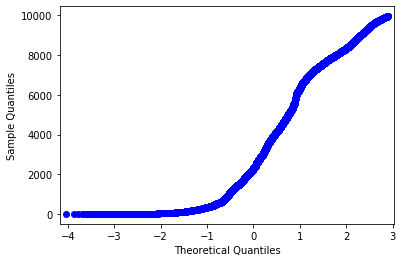

In [22]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(df_train_null['f7'], line='s')
plt.show()

ValueError: num must be 1 <= num <= 60, not 61

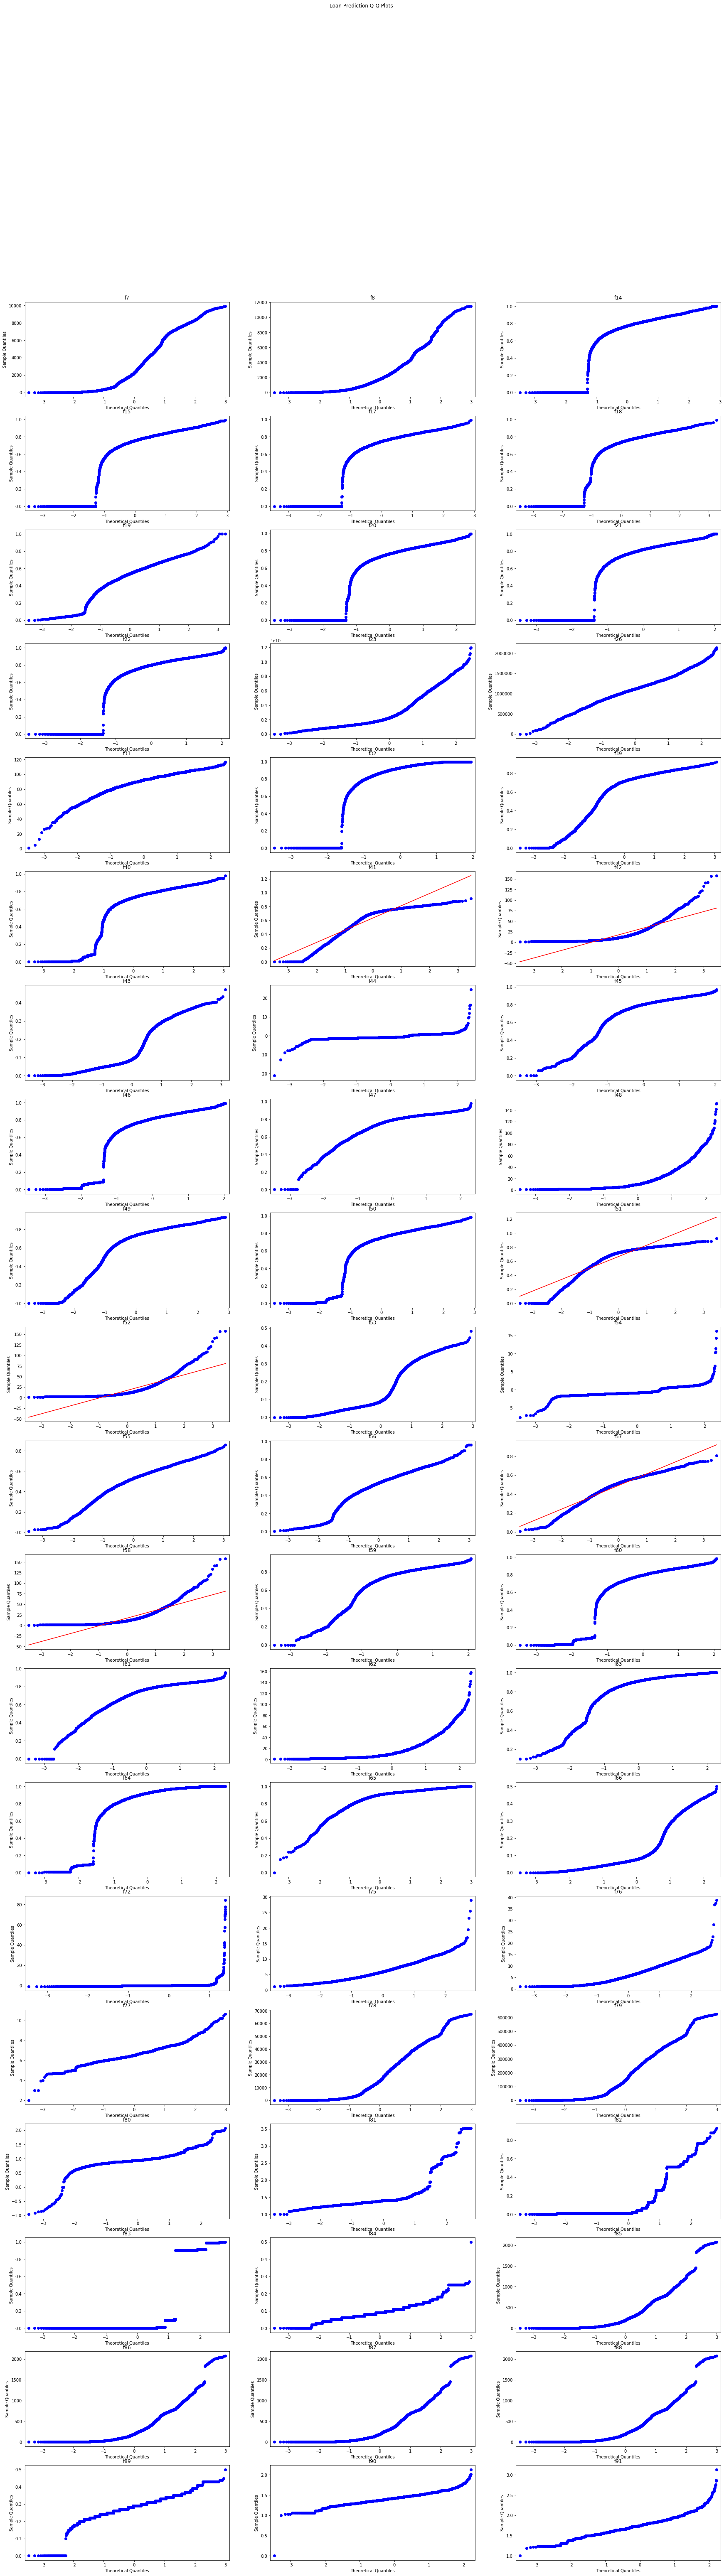

In [23]:
# 513 columns, therefore take sampling of 51 columns to view Q-Q plot. Blue plots fitting to red normal distribution line 
# suggests attribute data could be normally distributed. 
# Can be seen from plots, majority of data not normally distributed. Therefore we are assuming data as not normally distributed. 


df_sampling = df_train_null.sample(frac=0.1, random_state=0)

fig = plt.figure(figsize = (30, 100))
fig.suptitle('Loan Prediction Q-Q Plots')

j = 0

for i in df_sampling.columns:
    ax = fig.add_subplot(20, 3, j+1)
    ax.set_title(i)
    qqplot(df_sampling[i], ax=ax, line='s')
    j += 1

fig.tight_layout()


#plt.show()

In [24]:
# Since most of the data is not normal distribution, impute with Median central tendency.

df_train = df_train.apply(lambda x: x.fillna(x.median()),axis=0)

In [25]:
# Check if any null values remain.

max(df_train.isnull().sum())

0

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36915 entries, 43477 to 56924
Columns: 751 entries, f1 to loss
dtypes: float64(652), int64(98), uint64(1)
memory usage: 211.8 MB


#### Check for Outliers
1. Calculate standard deviation and take spread of 3 SD compare to all observations for each attribute to observe which is out of 3 SD spread. 
2. Take a copy of all these attributes and analyze outliers to determine if they true outliers. 

In [27]:
# Take a view of standard deviation

df_std = df_train.std()
print(df_std.head(10))
print(df_std.tail(10))

f1        14.725677
f2         1.703544
f3         0.289190
f4      1403.195577
f5         5.174325
f6     35687.048346
f7      2554.845936
f8      2279.220917
f9        13.807276
f10       14.498341
dtype: float64
f770     18.413914
f771      6.459544
f772      4.792628
f773      3.739509
f774      0.073072
f775      1.028127
f776      0.462836
f777      0.466943
f778    301.478556
loss      4.299221
dtype: float64


In [66]:
# Taking a look if data within IQR
# Using +/-3sigma not suitable to detect outliers given many distribution skewed. 
# Therefore using IQR is better suited.
# Consider removing worst outliers - revisit this if accuracy or prediction results not good
col_names = list(df_train)
#col_names = ['f32']
outlier_list = []
worst_outlier = []

for name in col_names:
    q1 = df_train[name].quantile(0.25)
    q3 = df_train[name].quantile(0.75)
    iqr = q3-q1
    #print(tempSD, tempUL, tempLL)
    df_train[name+'_iqr'] = df_train[name].apply(lambda x: (q1 - 1.5 * iqr)<x<(q3 + 1.5 * iqr))
    #print(df_train[name+'_SD'])
    
    if df_train[name].dtypes!='int64':
        if (df_train[name+'_iqr'].values.mean())<0.75:
            outlier_list.append(name)
            if (df_train[name+'_iqr'].values.mean())==0:        # only 1 unique value, therefore remove column
                df_train.drop(name, axis=1)
            elif (df_train[name+'_iqr'].values.mean())<0.10:
                worst_outlier.append(name)
        
#    if (df_train[name+'_SD'].values.mean())>0.95:
#        print(name + " does not have significant nbr of outliers")
#    else:
#        print(name + " has significant nbr of outliers")
        
    df_train = df_train.drop([name+'_iqr'], axis=1)
    

In [67]:
print(len(outlier_list))
print(len(worst_outlier))
print(outlier_list)


9
0
['f152', 'f595', 'f604', 'f615', 'f616', 'f617', 'f678', 'f723', 'f724']


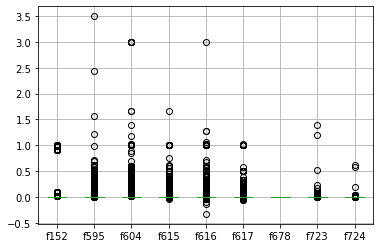

In [68]:
df_train.boxplot(column=outlier_list)

In [76]:
# 1.2% of columns have data that seems to have significant outliers (<70% in IQR)
print(len(outlier_list)/len(df_train.columns))
print(len(outlier_list))
print(len(worst_outlier))

# 9 columns or 28% have less than 3% within IQR. 
print(len(outlier_list)/362)

0.011984021304926764
9
0
0.024861878453038673


In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36915 entries, 43477 to 56924
Columns: 751 entries, f1 to loss
dtypes: float64(652), int64(98), uint64(1)
memory usage: 211.8 MB


In [78]:
# Drop outliers
df_train = df_train.drop(outlier_list, axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36915 entries, 43477 to 56924
Columns: 742 entries, f1 to loss
dtypes: float64(643), int64(98), uint64(1)
memory usage: 209.3 MB


In [102]:
# Check correlation   
x = df_train
y = x['loss']
y[y>0]=1
x = x.drop(columns=['loss'])

corr = x.corr()
    
#correlation = df_train.corr()

[ 1.00000000e+00 -2.09057247e-01 -3.91624558e-04  7.83986130e-01
 -2.71414698e-01  1.02282404e-01 -1.63448972e-01 -1.69297313e-01
  9.72042991e-01  9.98656581e-01  5.27128535e-02 -3.07384865e-01
 -3.33105053e-01 -7.37940952e-02 -3.39281715e-01 -4.06072715e-01
 -2.10621148e-01 -3.37689763e-01 -2.95491707e-01 -3.13408856e-01
  7.27470739e-01 -2.98405007e-01  3.03433605e-01  3.18769148e-01
  1.16175362e-01 -9.53996371e-02  2.66760116e-02 -1.38414423e-01
 -2.07002214e-02 -2.22499252e-01             nan             nan
             nan -7.77188862e-02             nan             nan
 -5.15747382e-01 -4.28936265e-01 -5.79986874e-01 -7.87959921e-02
  6.36757669e-01  5.46831285e-02 -3.86615788e-01 -3.13400223e-01
 -4.09707573e-01 -9.78899136e-02 -4.32784126e-01 -3.53008234e-01
 -4.86495759e-01 -7.92164713e-02  6.10848152e-01 -2.34734390e-02
 -2.80307603e-01 -2.23965671e-01 -3.83617005e-01 -7.87959921e-02
 -4.10254606e-01 -3.32719932e-01 -4.39736418e-01 -9.80751399e-02
 -3.06191345e-01 -2.45811

  1.40737547e-01]
[-0.29549171  0.00887505 -0.00383933 -0.32086936  0.10292944 -0.08524201
  0.15899786  0.11788375 -0.32433457 -0.30229451 -0.01242761  0.9052451
  0.89066004  0.09688684  0.913602    0.84475683  0.36938437  0.90668246
  1.          0.98409263 -0.11404885  0.91082935  0.49105582  0.28514066
  0.77307578  0.8745296   0.79405065  0.87954045  0.4481659   0.74956506
         nan         nan         nan  0.10104394         nan         nan
  0.70801273  0.83290123  0.44750248  0.10156013 -0.33256049 -0.05974467
  0.86639001  0.9779476   0.56425111  0.10741738  0.74854135  0.87903597
  0.44782944  0.10171706 -0.35784463 -0.02462775  0.36800559  0.37423903
  0.32795379  0.10156013  0.85051477  0.96472345  0.55205471  0.10694499
  0.69531837  0.76345849  0.479957   -0.40965906  0.22668369  0.01169626
  0.03640955  0.03919177  0.01372591  0.07562635  0.05013638  0.10104574
 -0.0737952  -0.05075718 -0.13766743  0.15600068  0.14576201  0.02229046
  0.04033554  0.04155024  0.028708

  1.55633492e-01]
[-5.79986874e-01  2.76005072e-02  1.65507200e-03 -6.02843437e-01
  2.11776711e-01 -1.69578047e-01  2.51501206e-01  2.36500651e-01
 -6.26705388e-01 -5.90172928e-01 -3.48123763e-02  5.45982406e-01
  5.69809221e-01  1.56212729e-01  5.68426932e-01  6.38813673e-01
  4.64939780e-01  5.53537816e-01  4.47502480e-01  4.66368174e-01
 -3.98134942e-01  5.38221727e-01  5.93530997e-02  5.76439636e-02
  2.04680334e-01  3.85996089e-01  2.67941889e-01  4.14351127e-01
  3.06940943e-01  3.69367560e-01             nan             nan
             nan  2.26760622e-01             nan             nan
  8.44557570e-01  6.78919654e-01  1.00000000e+00  2.27527406e-01
 -6.01531576e-01 -2.34444785e-01  6.11731766e-01  4.71997906e-01
  7.72323288e-01  2.78808856e-01  7.81234740e-01  6.06998237e-01
  9.61375538e-01  2.28012327e-01 -6.39188749e-01 -1.49912448e-01
  6.07523447e-01  4.93383729e-01  7.39598009e-01  2.27527406e-01
  6.38595925e-01  4.94261877e-01  7.97367643e-01  2.78028686e-01
  5.341

  1.23445219e-01]
[-0.24581158 -0.03659972 -0.00323606 -0.28192344  0.09845617 -0.08490749
  0.16035461  0.13374161 -0.27094518 -0.25134773 -0.03117473  0.72209781
  0.70879614  0.10630625  0.73083892  0.67323164  0.33862372  0.71450837
  0.76345849  0.75747377 -0.07869567  0.72901062  0.56806176  0.30743075
  0.60490585  0.69283941  0.6259815   0.699082    0.45662911  0.95935176
         nan         nan         nan  0.06919603         nan         nan
  0.60879657  0.67429109  0.40909232  0.06963169 -0.2872355  -0.05900428
  0.72750793  0.77202073  0.49839784  0.07942873  0.64681525  0.71309488
  0.4139972   0.06974379 -0.31219188 -0.03343409  0.35146957  0.34675592
  0.31284169  0.06963169  0.71458047  0.76448953  0.48998615  0.07924623
  0.91557996  1.          0.57544003 -0.48609153  0.17202281 -0.00776653
  0.03432183  0.02976456  0.0338574   0.02284844  0.02715027  0.0692051
 -0.07918266 -0.05451894 -0.15002514  0.15583036  0.14664621  0.03908525
  0.04861226  0.04817466  0.032033

[-2.65745078e-02 -2.00612548e-01  2.05144868e-03 -1.04400539e-01
  3.90003624e-02 -2.33971448e-01  8.93137063e-01  2.44609367e-01
 -4.88299233e-02 -3.05101006e-02 -5.12419203e-02  1.34714543e-01
  1.37739166e-01  3.68010481e-01  1.40810493e-01  1.39518606e-01
  1.55595203e-01  1.39184379e-01  1.32806043e-01  1.35264140e-01
 -1.79910293e-02  1.38785523e-01  1.94981507e-01  1.44001147e-01
  8.24998917e-02  1.14914580e-01  8.94652654e-02  1.17846875e-01
  1.68198295e-01  1.29232880e-01             nan             nan
             nan -1.10596924e-01             nan             nan
  1.61625996e-01  1.45281443e-01  1.61813091e-01 -1.10451916e-01
 -1.09824200e-01  1.55958680e-02  1.64442588e-01  1.37018331e-01
  1.77107397e-01 -1.07739226e-01  1.60645190e-01  1.43349586e-01
  1.57911908e-01 -1.10476090e-01 -1.14729156e-01  2.41892100e-02
  1.80103177e-01  1.62357572e-01  1.79261719e-01 -1.10451916e-01
  1.64904790e-01  1.38838128e-01  1.76078736e-01 -1.07498099e-01
  1.72863940e-01  1.39783

  1.75807285e-02]
[-3.89226096e-03  2.62565324e-03  1.75260828e-02 -9.55014270e-03
  8.63900852e-03 -7.02897945e-03  4.52980738e-02  2.03735544e-02
 -6.42650983e-03 -4.49174145e-03 -3.07116944e-02  1.48796545e-02
  1.47119426e-02  2.38048824e-02  1.49789285e-02  1.31901675e-02
  1.11511498e-02  1.42837632e-02  1.15075772e-02  1.16726110e-02
 -1.01938383e-03  1.43376321e-02  2.01492247e-02  1.56703958e-02
  1.00579956e-02  1.26635055e-02  9.83641397e-03  1.24726753e-02
  2.14730672e-02  1.82351961e-02             nan             nan
             nan -1.27386696e-03             nan             nan
  1.58431146e-02  1.34835500e-02  1.54728840e-02 -1.35476744e-03
 -5.76506596e-03  7.48311007e-03  1.32811674e-02  1.11565914e-02
  1.48133059e-02 -1.45315034e-03  1.61667699e-02  1.47891357e-02
  1.53229988e-02 -1.39691928e-03 -5.15683966e-03 -2.28024706e-03
  1.60923759e-02  1.25028893e-02  1.29858177e-02 -1.35476744e-03
  1.25711760e-02  1.12009545e-02  1.38434232e-02 -1.48192290e-03
  1.810

  8.25712925e-02]
[-6.37534138e-02 -1.86825238e-01  1.97779460e-03 -1.42452739e-01
  5.95658807e-02 -2.47223522e-01  9.49215275e-01  2.45227707e-01
 -8.82220075e-02 -6.82195173e-02 -5.59952484e-02  1.45455453e-01
  1.49721830e-01  3.57012744e-01  1.53228780e-01  1.55652338e-01
  1.65477856e-01  1.51788621e-01  1.41481520e-01  1.45019274e-01
 -5.61873105e-02  1.49319767e-01  1.76553084e-01  1.25888489e-01
  7.15263956e-02  1.14733736e-01  8.43679692e-02  1.20591727e-01
  1.66165071e-01  1.36024725e-01             nan             nan
             nan -1.09872616e-01             nan             nan
  1.84851097e-01  1.62720828e-01  1.91128086e-01 -1.09682467e-01
 -1.41558658e-01  1.32853083e-02  1.78392429e-01  1.46850838e-01
  1.95149902e-01 -1.05392424e-01  1.79136160e-01  1.56470144e-01
  1.82383927e-01 -1.09692529e-01 -1.45311499e-01  2.44235102e-02
  1.94937412e-01  1.73131208e-01  2.00200476e-01 -1.09682467e-01
  1.80397786e-01  1.49969653e-01  1.95753476e-01 -1.05181588e-01
  1.845

[ 4.43419898e-02 -1.45680351e-01 -4.68628839e-04  3.81190227e-02
 -2.50520339e-02 -1.02662647e-01  9.60926675e-02  1.22977872e-01
  4.49802920e-02  4.46545863e-02  7.78105879e-03  1.56459603e-02
  1.51070071e-02  1.90972760e-01  1.50401879e-02  1.06191066e-02
  3.69149641e-02  1.66748379e-02  1.74058152e-02  1.54852897e-02
  6.49439640e-02  2.08052424e-02  1.05356566e-01  8.42184084e-02
  4.03645562e-02  3.16477153e-02  2.69194963e-02  2.46771403e-02
  6.58328486e-02  2.17977759e-02             nan             nan
             nan -5.56990427e-02             nan             nan
  4.15244939e-03  9.83306577e-03 -1.95503447e-03 -5.57364163e-02
  2.26554703e-02  2.31893616e-02  1.91295928e-02  1.91020201e-02
  3.07782659e-02 -5.89568816e-02  7.56817791e-03  1.42847255e-02
  3.70466409e-03 -5.57112111e-02  1.95558411e-02  1.64056694e-02
  3.97897625e-02  3.82564183e-02  3.22928173e-02 -5.57364163e-02
  1.55777622e-02  1.74432513e-02  2.61448044e-02 -5.86795146e-02
  2.88322040e-02  2.15386

 -7.16104771e-03]
[-3.96781080e-02  1.34133408e-01 -1.16396074e-03 -6.20135573e-04
  2.48021760e-02  5.66995745e-02 -9.79903553e-02 -9.19060681e-02
 -3.82214470e-02 -3.98132293e-02  1.97311249e-02 -7.10938554e-02
 -7.00472689e-02 -1.16601896e-01 -7.58899235e-02 -6.66303413e-02
 -9.38527812e-02 -6.76292282e-02 -6.21854007e-02 -6.08577739e-02
 -6.42465789e-02 -7.73267106e-02 -1.77862301e-01 -1.41947071e-01
 -7.43668064e-02 -7.86148018e-02 -6.65490410e-02 -7.40611323e-02
 -1.27902749e-01 -8.47591626e-02             nan             nan
             nan  8.55841893e-02             nan             nan
 -8.04901425e-02 -7.02960227e-02 -7.83362802e-02  8.55777375e-02
  2.21925724e-02 -1.44006218e-02 -8.51361924e-02 -6.70994034e-02
 -1.00173091e-01  8.34935928e-02 -8.90426983e-02 -7.41895346e-02
 -9.01290006e-02  8.56864945e-02  3.56333367e-02 -1.66807786e-02
 -1.09874029e-01 -9.87213937e-02 -9.74809352e-02  8.55777375e-02
 -8.10743231e-02 -6.55924256e-02 -9.43486303e-02  8.34367515e-02
 -1.223

 -8.45848456e-03]
[-8.42626737e-02  2.63256288e-01  5.27729082e-04 -3.51284278e-02
  2.94680696e-02  6.33447529e-02 -1.35762994e-01 -1.29283211e-01
 -8.41893059e-02 -8.49876875e-02  1.99314336e-02 -8.33031946e-02
 -8.21204860e-02 -1.68618077e-01 -8.66160323e-02 -7.54332671e-02
 -1.41557055e-01 -7.79303524e-02 -7.07929239e-02 -6.85085092e-02
 -1.30701083e-01 -9.02886753e-02 -2.72300529e-01 -2.29335422e-01
 -1.02511401e-01 -9.98847189e-02 -8.74010691e-02 -9.17127761e-02
 -1.93123818e-01 -9.84070438e-02             nan             nan
             nan  1.07094943e-01             nan             nan
 -9.62591114e-02 -8.00606396e-02 -9.24531504e-02  1.07069876e-01
 -1.98459742e-03 -2.03157541e-02 -1.06063236e-01 -7.78646430e-02
 -1.26734765e-01  1.05363938e-01 -1.10438800e-01 -8.76751078e-02
 -1.11872975e-01  1.07165072e-01  1.53080868e-02 -1.40023600e-02
 -1.63973083e-01 -1.48107440e-01 -1.37786629e-01  1.07069876e-01
 -1.00906230e-01 -7.53214965e-02 -1.19772477e-01  1.05267024e-01
 -1.534

 -2.63831464e-02]
[-1.31591357e-02 -3.23509844e-01 -7.64211329e-04 -3.11807309e-02
 -3.39079578e-02 -9.56339757e-02  1.36208134e-01  1.37150248e-01
 -1.70884709e-02 -1.38310749e-02 -6.36166293e-03  6.23309203e-02
  6.34484410e-02  2.85768414e-01  7.09772904e-02  6.61063249e-02
  1.25212368e-01  6.16889672e-02  5.42836949e-02  5.28860803e-02
  3.24988121e-02  6.85516879e-02  1.89178761e-01  1.49139176e-01
  4.28569129e-02  5.77675077e-02  3.58649229e-02  5.35870648e-02
  1.53760281e-01  6.74384843e-02             nan             nan
             nan -8.17313021e-02             nan             nan
  7.83421248e-02  6.90225453e-02  8.82780009e-02 -8.16524247e-02
 -8.89461778e-03  1.37404659e-02  7.49766260e-02  5.81067075e-02
  9.53950121e-02 -8.20078238e-02  7.68808644e-02  6.64470670e-02
  8.76423288e-02 -8.16889433e-02 -1.26439903e-02  1.20541646e-02
  1.51984788e-01  1.31796428e-01  1.61371664e-01 -8.16524247e-02
  7.10084247e-02  5.68544381e-02  8.62568495e-02 -8.16344300e-02
  9.844

 -4.28219327e-02]
[-6.81291533e-02 -2.65693876e-01  2.52512985e-04 -9.84942015e-02
 -2.95493306e-02 -1.14679614e-01  2.59654122e-01  9.21478255e-01
 -7.49140144e-02 -6.95246330e-02 -1.75018079e-02  1.19006708e-01
  1.20505364e-01  3.06157718e-01  1.31465600e-01  1.29307897e-01
  1.44372324e-01  1.17767806e-01  1.00533937e-01  1.02785022e-01
 -1.03751628e-02  1.30990383e-01  2.10695710e-01  1.41868083e-01
  7.69336100e-02  1.07948650e-01  7.39854728e-02  1.05668777e-01
  1.69767429e-01  1.16643504e-01             nan             nan
             nan -1.13156835e-01             nan             nan
  1.62723093e-01  1.36404845e-01  1.87577865e-01 -1.12964737e-01
 -1.14486603e-01  4.96593082e-03  1.35251287e-01  1.06407339e-01
  1.71117163e-01 -1.05525727e-01  1.55975937e-01  1.27444064e-01
  1.84678087e-01 -1.12987029e-01 -1.21742990e-01  1.64779253e-02
  1.74841565e-01  1.52074677e-01  1.83332495e-01 -1.12964737e-01
  1.35735468e-01  1.08348523e-01  1.67562493e-01 -1.05697136e-01
  1.663

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[-7.77440150e-02  7.65197622e-02 -3.55037516e-04 -1.03941742e-01
  7.33491400e-02  1.10254821e-02 -9.59747860e-02 -2.51576199e-02
 -8.48421400e-02 -7.90112564e-02  1.62848798e-02  1.12289676e-01
  1.15766854e-01 -1.07496834e-01  1.09964106e-01  1.26429171e-01
  1.70172804e-01  1.13440172e-01  1.01045743e-01  1.04406814e-01
 -3.28866643e-02  1.00871094e-01 -1.21288108e-02  9.99114984e-02
  5.24965824e-02  7.91081218e-02  4.93561195e-02  7.67138635e-02
  1.43167255e-01  6.56616936e-02             nan             nan
             nan  9.99997679e-01             nan             nan
  1.84859340e-01  1.36186393e-01  2.26764034e-01  9.99960215e-01
  4.79333229e-02 -2.59430301e-01  1.52593899e-01  1.05497059e-01
  2.40327749e-01  9.87933005e-01  1.76375331e-01  1.25041968e-01
  2.26325903e-01  9.99933580e-01  5.62285148e-02 -2.50111714e-01
  2.48370170e-01  1.83424895e-01  3.38358956e-01  9.99960215e-01
  1.57747324e-01  1.10067002e-01  2.36733766e-01  9.88295041e-01
  1.01524824e-01  6.9205

[-1.93371676e-01 -9.79357015e-02  6.92129269e-04 -2.61598535e-01
  1.31582611e-01 -2.33334869e-01  9.86112712e-01  2.07715472e-01
 -2.21352659e-01 -1.98956494e-01 -6.70445202e-02  1.63842760e-01
  1.72057514e-01  2.65905665e-01  1.75903010e-01  1.90879139e-01
  1.74851092e-01  1.76031252e-01  1.58612495e-01  1.65169928e-01
 -1.82733220e-01  1.65112684e-01  8.30826938e-02  4.50984941e-02
  2.35453635e-02  9.81704724e-02  5.38433484e-02  1.12780158e-01
  1.36345672e-01  1.44480415e-01             nan             nan
             nan -8.17013218e-02             nan             nan
  2.37626444e-01  2.01077998e-01  2.60033051e-01 -8.13630635e-02
 -2.30291981e-01  1.67575146e-03  2.06721606e-01  1.66274094e-01
  2.30504445e-01 -7.39846482e-02  2.16648164e-01  1.81330727e-01
  2.34781307e-01 -8.12780005e-02 -2.27485517e-01  2.22769401e-02
  2.14008610e-01  1.83840598e-01  2.38200214e-01 -8.13630635e-02
  2.13467855e-01  1.73087337e-01  2.36677156e-01 -7.38970012e-02
  2.00295566e-01  1.57571

  1.27332503e-01]
[ 1.45712468e-02 -5.16000580e-02 -7.54942395e-03 -5.78082455e-03
 -7.64861062e-03  1.42047866e-02  7.27363701e-02  8.26939770e-02
  6.91232865e-03  1.30485916e-02 -1.30686020e-02  3.92020549e-02
  3.97840690e-02  2.22454889e-02  3.85749297e-02  3.93396011e-02
  5.37402825e-02  3.91117952e-02  4.39801364e-02  4.10644237e-02
  2.83240416e-02  3.82070949e-02  7.84865806e-02  6.72345540e-02
  3.31913838e-02  3.70321275e-02  3.13954481e-02  3.58589851e-02
  6.63894665e-02  5.10309399e-02             nan             nan
             nan  4.46100938e-03             nan             nan
  3.92619184e-02  3.98134565e-02  3.79346504e-02  4.48002090e-03
 -1.38966218e-04 -5.04648260e-03  5.10203979e-02  4.43943649e-02
  5.53576817e-02  4.61649488e-03  4.18731640e-02  4.05772037e-02
  4.20218457e-02  4.44363120e-03 -4.88061465e-03 -4.45053755e-03
  5.88728983e-02  5.54394616e-02  5.34515399e-02  4.48002090e-03
  4.67912815e-02  4.13950808e-02  4.97521809e-02  4.39180080e-03
  6.204

  7.46565709e-02]
[ 9.75573939e-02 -1.12426159e-01  3.62526825e-03  5.42751645e-02
 -2.28520817e-02 -1.16006537e-01  5.08203355e-01  1.31705279e-01
  9.22437931e-02  9.71475623e-02 -2.68811716e-02  5.05205931e-02
  4.85961698e-02  2.31025248e-01  4.62514958e-02  3.47360378e-02
  4.71731739e-02  4.71114415e-02  5.53594858e-02  5.42467678e-02
  1.02744943e-01  5.19536874e-02  1.51893420e-01  1.24457317e-01
  8.85657708e-02  7.28290207e-02  7.52378084e-02  6.59448707e-02
  8.74432759e-02  5.34094373e-02             nan             nan
             nan -6.02229406e-02             nan             nan
  2.21767566e-02  3.35103367e-02 -2.65470209e-03 -6.02568253e-02
  3.11781575e-02  1.59691055e-02  5.48758259e-02  5.34865339e-02
  4.47931911e-02 -6.29952146e-02  3.81611465e-02  4.78478601e-02
  1.13802287e-02 -6.02640885e-02  2.50371718e-02  1.07133391e-02
  4.14506166e-02  4.75595890e-02  1.79831884e-02 -6.02568253e-02
  5.16942553e-02  5.12960311e-02  4.21402547e-02 -6.28577525e-02
  6.063

  1.00235114e-01]
[-1.03124077e-01 -1.65676118e-01  1.67994092e-03 -1.80262198e-01
  7.78504264e-02 -2.52023492e-01  9.79078239e-01  2.42553272e-01
 -1.29265238e-01 -1.08035536e-01 -5.97470271e-02  1.53005798e-01
  1.58448714e-01  3.34572140e-01  1.62305486e-01  1.68674439e-01
  1.70760951e-01  1.61090668e-01  1.47115401e-01  1.51794595e-01
 -9.66633709e-02  1.56386530e-01  1.50680167e-01  1.01758554e-01
  5.75250366e-02  1.11186431e-01  7.62012935e-02  1.19943404e-01
  1.58511029e-01  1.39370424e-01             nan             nan
             nan -1.06312768e-01             nan             nan
  2.04315085e-01  1.76904341e-01  2.16408258e-01 -1.06081106e-01
 -1.71838339e-01  1.08018258e-02  1.88495391e-01  1.53595030e-01
  2.08600995e-01 -1.00402539e-01  1.93687456e-01  1.66197088e-01
  2.02658794e-01 -1.06072503e-01 -1.74100050e-01  2.42983165e-02
  2.04305275e-01  1.79098007e-01  2.15706939e-01 -1.06081106e-01
  1.92149860e-01  1.58059761e-01  2.11045430e-01 -1.00229144e-01
  1.915

  6.93533284e-03]
[ 3.66861929e-02 -6.21803674e-02 -3.72894290e-03  2.51956047e-02
  7.15994647e-03 -2.56194691e-02  2.20582672e-02  8.07219744e-02
  3.63710961e-02  3.68039045e-02 -8.13954137e-03  8.70871445e-03
  6.03520532e-03  5.29538771e-02  7.34269743e-03  1.48545893e-03
  1.26588568e-02  7.05933385e-03  9.22562422e-03  8.30772331e-03
  5.05691226e-02  1.20954398e-02  6.34016932e-02  6.15880793e-02
  3.17904800e-02  2.26445839e-02  1.92821784e-02  1.63069380e-02
  4.19115927e-02  1.75323339e-02             nan             nan
             nan -7.88097009e-03             nan             nan
  1.36039775e-03  8.47661926e-04  6.09421320e-03 -7.99942042e-03
  2.05534387e-02 -2.38999677e-03  9.34358464e-03  3.78613796e-03
  1.67590482e-02 -7.32991069e-03  4.46765024e-03  4.99769348e-03
  9.41940289e-03 -8.02531045e-03  1.84980099e-02 -4.87737886e-03
  2.00444633e-02  1.42346311e-02  2.09053451e-02 -7.99942042e-03
  7.87771129e-03  3.99716759e-03  1.20845295e-02 -7.11392272e-03
  2.693

[-1.69298083e-01 -1.60990991e-01 -1.80353896e-03 -2.04865940e-01
  6.91428481e-04 -7.36624341e-02  2.27589066e-01  9.99999978e-01
 -1.81852147e-01 -1.72155349e-01 -1.78360279e-02  1.35460435e-01
  1.40684375e-01  2.18799526e-01  1.49560719e-01  1.57570403e-01
  1.39831616e-01  1.38816552e-01  1.17882668e-01  1.22299948e-01
 -1.25754314e-01  1.43496075e-01  1.17706569e-01  6.05202884e-02
  4.21325182e-02  9.65322476e-02  4.61673695e-02  9.72084828e-02
  1.31757815e-01  1.21375709e-01             nan             nan
             nan -2.51337317e-02             nan             nan
  2.02628339e-01  1.66828493e-01  2.36500203e-01 -2.48648916e-02
 -1.79717024e-01 -2.15218413e-02  1.58149509e-01  1.24672283e-01
  1.93407007e-01 -1.56367338e-02  1.85894094e-01  1.49565901e-01
  2.21827357e-01 -2.48307746e-02 -1.82103965e-01  7.84638130e-05
  1.74864874e-01  1.47829657e-01  1.97605626e-01 -2.48648916e-02
  1.62397345e-01  1.29162459e-01  1.95069619e-01 -1.61182363e-02
  1.72979697e-01  1.33740

 -1.61614308e-02]
[-1.01485481e-01 -2.33432927e-01 -2.76660299e-04 -1.32864375e-01
 -2.07443683e-02 -1.02821755e-01  2.53777381e-01  9.64885742e-01
 -1.10291683e-01 -1.03383926e-01 -2.06670691e-02  1.25692906e-01
  1.28371499e-01  2.78778083e-01  1.38765399e-01  1.39887032e-01
  1.43661663e-01  1.25568616e-01  1.06099276e-01  1.09174724e-01
 -4.81636074e-02  1.36557691e-01  1.82171499e-01  1.15125940e-01
  6.64380044e-02  1.05439086e-01  6.63481901e-02  1.04424093e-01
  1.57879305e-01  1.19052974e-01             nan             nan
             nan -8.93632732e-02             nan             nan
  1.77772305e-01  1.47806145e-01  2.05990216e-01 -8.91493944e-02
 -1.38481192e-01 -2.15880187e-03  1.42793557e-01  1.12374353e-01
  1.78686440e-01 -8.08165210e-02  1.67679711e-01  1.36068298e-01
  1.99129399e-01 -8.91659960e-02 -1.44380346e-01  1.31158215e-02
  1.75926484e-01  1.51516027e-01  1.88695325e-01 -8.91493944e-02
  1.44690147e-01  1.15291227e-01  1.77193467e-01 -8.11140022e-02
  1.700

 -6.32691607e-02]
[ 6.36602773e-03  1.51084988e-01  3.71928720e-03  1.31915348e-02
 -5.29641516e-02  2.39949031e-02 -1.14496546e-01 -7.48063535e-02
 -3.64349670e-03  4.13480774e-03  7.76511248e-01 -5.95976448e-02
 -5.52502276e-02 -9.07759229e-02 -5.92483556e-02 -4.37333038e-02
 -4.55132722e-02 -5.46083415e-02 -5.68642920e-02 -5.51966745e-02
 -2.88918368e-02 -6.15506627e-02 -1.68381710e-01 -8.89841114e-02
 -4.93740490e-02 -5.75367668e-02 -5.99130478e-02 -6.29950181e-02
 -8.25949469e-02 -9.70466005e-02             nan             nan
             nan  1.41890923e-01             nan             nan
 -2.93213335e-02 -4.28086823e-02 -9.22092807e-03  1.41863304e-01
  5.51969372e-02 -6.66183918e-02 -5.18144744e-02 -6.04722167e-02
 -2.17500538e-02  1.36677583e-01 -4.09478170e-02 -5.53483514e-02
 -1.34881365e-02  1.41952773e-01  6.10463759e-02 -5.87278435e-02
 -2.58514104e-02 -4.39533225e-02  3.05193535e-03  1.41863304e-01
 -4.68342506e-02 -5.75779485e-02 -1.76693970e-02  1.36520233e-01
 -1.035

[ 5.90795244e-02  2.54823824e-01 -2.10818958e-03  1.10528274e-01
 -4.33061961e-02  1.33774221e-01 -1.79612560e-01 -1.66858972e-01
  7.72335097e-02  6.18214280e-02  2.20797302e-02 -2.99800754e-01
 -3.02129309e-01 -1.79746448e-01 -3.09075085e-01 -3.08811850e-01
 -4.12177955e-01 -2.98586792e-01 -2.86362368e-01 -2.85355660e-01
 -1.26915756e-01 -3.01665827e-01 -4.08431438e-01 -4.62238626e-01
 -2.07377691e-01 -2.64037147e-01 -2.24109964e-01 -2.71176340e-01
 -5.38615835e-01 -3.31365529e-01             nan             nan
             nan -1.98865027e-01             nan             nan
 -4.09632413e-01 -3.28497809e-01 -4.59277410e-01 -1.99218050e-01
  9.42355568e-02  8.42510812e-02 -4.12969450e-01 -3.03590824e-01
 -5.51426833e-01 -2.00754846e-01 -4.18227490e-01 -3.23265256e-01
 -4.87455988e-01 -1.99237499e-01  1.11570562e-01  8.39053857e-02
 -5.34283703e-01 -4.37609001e-01 -5.86913512e-01 -1.99218050e-01
 -4.04610856e-01 -3.01927167e-01 -5.31156842e-01 -2.00508464e-01
 -4.91388150e-01 -3.57382

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [103]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
upper.head()

f1        f2        f3        f4        f5        f6        f7        f8  \
f1 NaN -0.209057 -0.000392  0.783986 -0.271415  0.102282 -0.163449 -0.169297   
f2 NaN       NaN  0.002979 -0.210666  0.220294  0.090791 -0.131889 -0.160991   
f3 NaN       NaN       NaN  0.000214  0.002109  0.002027  0.000067 -0.001802   
f4 NaN       NaN       NaN       NaN -0.258891  0.122056 -0.236687 -0.204866   
f5 NaN       NaN       NaN       NaN       NaN -0.061567  0.111401  0.000692   

          f9       f10  ...      f769      f770      f771      f772      f773  \
f1  0.972043  0.998657  ...  0.052430 -0.077717 -0.040040  0.032526 -0.027178   
f2 -0.246337 -0.217197  ... -0.012491  0.076477 -0.023814  0.048461 -0.067641   
f3 -0.000226 -0.000441  ... -0.000642 -0.000343  0.001277 -0.001636  0.001876   
f4  0.833754  0.795828  ...  0.090589 -0.103912 -0.084912  0.081701 -0.079495   
f5 -0.286476 -0.275342  ... -0.062385  0.073336  0.057806 -0.055118  0.053162   

        f774      f775      f776      f777      f778  
f1  0.002609  0.065030  0.077953  0.873714 -0.267548  
f2 -0.026139 -0.178461 -0.102146 -0.223237  0.219593  
f3 -0.004478 -0.007686  0.003019  0.002011 -0.002936  
f4 -0.027878  0.033757  0.037889  0.876713 -0.259287  
f5  0.040833 -0.018301 -0.032820 -0.306636  0.769257  

[5 rows x 741 columns]

In [106]:
# Select columns with correlations above threshold
threshold = 0.90

to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 455 columns to remove.


In [108]:
print(x.shape)
x = x.drop(columns=to_drop)
print(x.shape)

(36915, 741)
(36915, 286)


#### Start Visualization



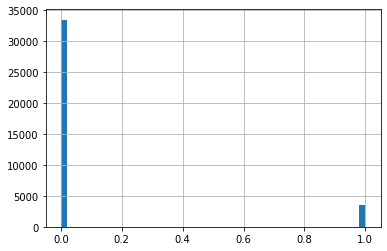

In [109]:
# Take a look at loss distribution
y.hist(bins=50)

#### Start Modeling

In [111]:
y.value_counts()

0    33468
1     3447
Name: loss, dtype: int64

In [116]:
# Split Into Training and Testing Sets
from sklearn.model_selection import train_test_split

target = pd.DataFrame(df_train['loss'])

# Split into 80% training and 20% testing set
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(29532, 286)
(7383, 286)
(29532, 1)
(7383, 1)


In [117]:
# Normalizing data
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

random = RandomForestClassifier(n_estimators =15) 
# 10-Fold Cross validation
scores  = cross_val_score(random, X_train, y_train, cv=10)

In [119]:
ranmodel  = random.fit( X_train, y_train)

Random Forest Performance on the training  set: Cross Validation Score 0.9052




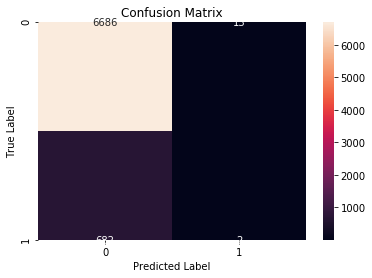

In [120]:
y_ran_pred  = ranmodel.predict(X_test)

print('Random Forest Performance on the training  set: Cross Validation Score',round(scores.mean(),4))

print('\n')

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_ran_pred)
class_label = ["0", "1"]
df_cm1 = pd.DataFrame(cm1, index=class_label,columns=class_label)
sns.heatmap(df_cm1, annot=True,fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [122]:
from sklearn.metrics import f1_score

print("F score from Random Forest for test data is :",round(f1_score(y_test, y_ran_pred, average='macro'),3))

F score from Random Forest for test data is : 0.478
